# Pandas 101 Practice

Resource: Effective Pandas by Matt Harrison

---

## 1. Getting Started

What is Pandas?

- What is Pandas? Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

Why use Pandas?

- Pandas strengthens Python by giving the popular programming language the capability to work with spreadsheet-like data enabling fast loading, aligning, manipulating, and merging, in addition to other key functions.

Official documentation

- https://pandas.pydata.org/docs/


In [1]:
# installing pandas
# pip install pandas

In [2]:
# load pandas
import pandas as pd
import numpy as np

In [3]:
pd.__version__ # check pandas version

'2.1.3'

---

## 2. Data Structures

Series: single column of data (1 dimensional)
<br>Dataframe: rows and columns (2 dimensional)

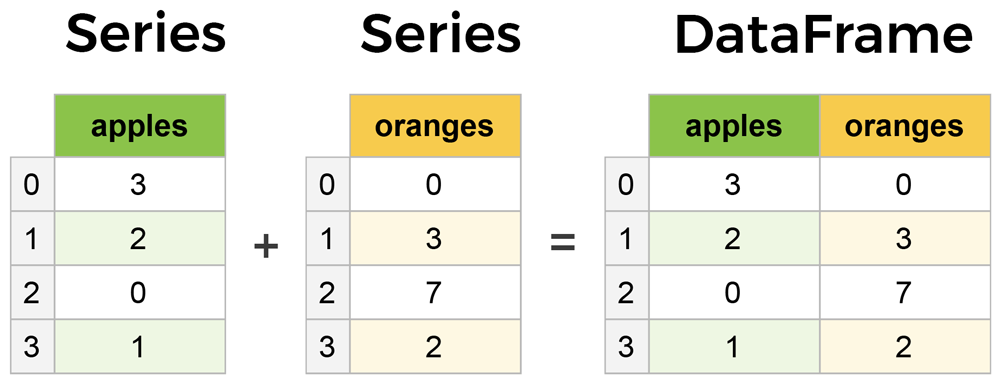

### 2.1 Series

In [4]:
# create a series
songs2 = pd.Series([145, 142, 38, 13], name='counts')
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [5]:
print(songs2.values)
print(songs2.index)
print(songs2.name)

[145 142  38  13]
RangeIndex(start=0, stop=4, step=1)
counts


- Values of a Series can hold strings, floats, booleans ..
- Series allow vectorized operations

NaN = Not a Number
- NaN value is usually ignored in arithmetic operations

In [6]:
nan_series = pd.Series([2, np.nan], index=['Ono', 'Clapton'])
nan_series

Ono        2.0
Clapton    NaN
dtype: float64

In [7]:
nan_series.count() # NaN value is not counted

1

In [8]:
nan_series.shape

(2,)

In [9]:
# You can use .astype method to convert columns to the nullable integer type
nan_series.astype('Int64')

Ono           2
Clapton    <NA>
dtype: Int64

pd Series behave similar to np Arrays

In [10]:
numpy_ser = np.array([1, 3, 5, 7])
pd_ser = pd.Series([1, 3, 5, 7])

print(numpy_ser.mean())
print(pd_ser.mean())

4.0
4.0


Creating a boolean mask for filtering a series

In [11]:
mask = pd_ser > pd_ser.median()
mask

0    False
1    False
2     True
3     True
dtype: bool

In [12]:
pd_ser[mask] # only returns bool True

2    5
3    7
dtype: int64

Create categories data type

In [13]:
s = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype='category') # pass category as datatype
s

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [14]:
# check if category is ordered
print(s.cat.ordered)

# to convert to ordered category
s2 = pd.Series(['m', 'l', 'xs', 's', 'xl'])
size_type = pd.api.types.CategoricalDtype(
    categories=['s','m','l'], ordered=True
)

s3 = s2.astype(size_type)
print(s3)
print('---')

# create bool mask
print(s3 > 's')

False
0      m
1      l
2    NaN
3      s
4    NaN
dtype: category
Categories (3, object): ['s' < 'm' < 'l']
---
0     True
1     True
2    False
3    False
4    False
dtype: bool


Exercise: create series with temperature values for last 7 days, and filter out values below the mean

In [15]:
temp = pd.Series([20,21,22,21,20,25,23], name='temp')

mask = temp > temp.mean()

temp[mask]

2    22
5    25
6    23
Name: temp, dtype: int64

### 2.2 Series Deep Dive

In [16]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url)

# loading the columns of the dataset
city_mpg = df.city08
highway_mpg = df.highway08

C:\Users\sunse\AppData\Local\Temp\ipykernel_19488\3267294540.py:2: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [17]:
print(city_mpg[:5], city_mpg.shape)
print(highway_mpg[:5], highway_mpg.shape)

0    19
1     9
2    23
3    10
4    17
Name: city08, dtype: int64 (41144,)
0    25
1    14
2    33
3    12
4    23
Name: highway08, dtype: int64 (41144,)


In [18]:
# list the attributes of an object
len(dir(city_mpg))

418

Python methods:

- dunder: __add__, __iter__
- aggregate: .mean, .max
- conversion: .to_
- manipulation: .sort_values, .drop_duplicates
- index & accessor: .loc, .iloc
- string: .str
- date: .dt
- plotting: .plot
- categorical: .cat
- transformation: .unstack, .transform, .reset_index
- attributes: .index, .dtype

## 3. Operators

Dunder Methods

In [19]:
# in python
print (2+4)

# under the hood, python runs this:
(2).__add__(4)

6


6

You can apply most math operations on series with a another series.
<br>When you operate on multiple series, pandas will align the index before performing the operation. Ensure index is common to all series before executing math operations 

In [20]:
s1 = pd.Series([10, 20, 30], index=[0,1,2])
s2 = pd.Series([1,2,3], index=[0,1,2])

print(s1+s2)

0    11
1    22
2    33
dtype: int64


Broadcasting values

In [21]:
print(s1 + 1, '\n', s1*2)

0    11
1    21
2    31
dtype: int64 
 0    20
1    40
2    60
dtype: int64


## 4. Aggregate Methods

In [22]:
# mean
print(city_mpg.mean())

# max
print(city_mpg.max())

# quantile
print(city_mpg.quantile([.1, .5, .9]))

# count
print(city_mpg.count())

# median
print(city_mpg.median())

18.369045304297103
150
0.1    13.0
0.5    17.0
0.9    24.0
Name: city08, dtype: float64
41144
17.0


Use 'agg' for multiple aggregations

In [23]:
city_mpg.agg(['mean', max, np.var])

C:\Users\sunse\AppData\Local\Temp\ipykernel_19488\3621879270.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  city_mpg.agg(['mean', max, np.var])
C:\Users\sunse\AppData\Local\Temp\ipykernel_19488\3621879270.py:1: FutureWarning: The provided callable <function var at 0x000001C9AC8C4040> is currently using Series.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  city_mpg.agg(['mean', max, np.var])


mean     18.369045
max     150.000000
var      62.503036
Name: city08, dtype: float64

In [24]:
city_mpg.isna().sum() # no of missing values

0

In [25]:
city_mpg.value_counts()

city08
15     4503
18     4053
17     4035
16     3975
19     3012
       ... 
127       1
114       1
140       1
115       1
104       1
Name: count, Length: 105, dtype: int64

## 5. Conversion Methods

In [26]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [27]:
city_mpg.astype(str)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: object

In [28]:
city_mpg.astype('category')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6, 7, 8, 9, ..., 137, 138, 140, 150]

## 6. Manipulation Methods

- the workhorse of pandas
- data processing and cleaning
- most methods discussed here manipulate series values but preserve the index

In [29]:
def gt20(val):
    return val > 20

In [30]:
# apply allows you to apply a function element-wise to every value
city_mpg.apply(gt20)

0        False
1        False
2         True
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: city08, Length: 41144, dtype: bool

In [31]:
make = df.make
make.value_counts()

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

In [32]:
top5 = make.value_counts().index[:5]
def generalize_top5(val):
    if val in top5:
        return val
    return 'Other'

make.apply(generalize_top5)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [33]:
# isin method
make.isin(top5)

0        False
1        False
2         True
3         True
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: make, Length: 41144, dtype: bool

In [34]:
# .where method
make.where(
    make.isin(top5),
    other='Other'
)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [35]:
# tilde ~ inverts the condition
make.where(
    ~make.isin(top5),
    other='Other'
)

0        Alfa Romeo
1           Ferrari
2             Other
3             Other
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

Missing Data

In [36]:
cyl = df.cylinders
cyl.isna().sum() # no of missing data

206

In [37]:
missing = cyl.isna() # missing mask
make.loc[missing] # makes with missing cylinder values

7138     Nissan
7139     Toyota
8143     Toyota
8144       Ford
8146       Ford
          ...  
34563     Tesla
34564     Tesla
34565     Tesla
34566     Tesla
34567     Tesla
Name: make, Length: 206, dtype: object

Seems like cylinder information is missing from cars that are electric because it has an electric engine, not a combustion engine, hence 0 cylinders

In [38]:
# use fillna method to specify a replacement for missing data
cyl[cyl.isna()]

cyl.fillna(0)

0         4.0
1        12.0
2         4.0
3         8.0
4         4.0
         ... 
41139     4.0
41140     4.0
41141     4.0
41142     4.0
41143     4.0
Name: cylinders, Length: 41144, dtype: float64

Possible fill options:

1. drop missing values: dropna()
2. forward fill: ffill()
3. backward fill: bfill()
4. fill missing value: fillna(data.mean()) -- in this case filling with mean value
5. interpolate: interpolate() -- handy if the data is ordered


In [39]:
# sort values
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

In [40]:
# sort index
city_mpg.sort_values().sort_index()

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [41]:
# drop duplicates
city_mpg.drop_duplicates()

0         19
1          9
2         23
3         10
4         17
        ... 
34364    127
34409    114
34564    140
34565    115
34566    104
Name: city08, Length: 105, dtype: int64

In [46]:
# replace data (map values to new values)
make.replace('Subaru', 'Sub')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4               Sub
            ...    
41139           Sub
41140           Sub
41141           Sub
41142           Sub
41143           Sub
Name: make, Length: 41144, dtype: object

Exercise 9.14

In [51]:
# ex 9.14

#q1
mean = city_mpg.mean()

def high_low(val):
    if val >= mean:
        return 'high'
    else: return 'low'

hl = city_mpg.apply(high_low)
hl

0        high
1         low
2        high
3         low
4         low
         ... 
41139    high
41140    high
41141     low
41142     low
41143     low
Name: city08, Length: 41144, dtype: object

In [57]:
#q2

conditions = [city_mpg >= mean]
choices = ['high']

hl = np.select(conditions, choices, default='low')
hl

array(['high', 'low', 'high', ..., 'low', 'low', 'low'], dtype='<U4')

In [58]:
#q3
import timeit

apply_time = timeit.timeit(lambda: city_mpg.apply(high_low), number=1000)
select_time = timeit.timeit(lambda: np.select(conditions, choices, default='low'), number=1000)

print(apply_time, select_time)

3.2580640999949537 0.12450910004554316


In [63]:
#q4
print(cyl.isna().sum())
cyl.fillna(cyl.median()).isna().sum()

206


0

In [67]:
#q5
low = city_mpg.quantile(.1)
high = city_mpg.quantile(.9)

print(low, high)
print(city_mpg.min(), city_mpg.max())

clip = city_mpg.clip(lower=low, upper=high)
print(clip.min(), clip.max())

13.0 24.0
6 150
13 24


In [77]:
#q6
top5 = make.value_counts().index[:5]
def generalize(val):
    if val in top5:
        return val
    else: return 'Others'


make.apply(generalize)

0        Others
1        Others
2         Dodge
3         Dodge
4        Others
          ...  
41139    Others
41140    Others
41141    Others
41142    Others
41143    Others
Name: make, Length: 41144, dtype: object

In [82]:
#q7
vc = make.value_counts()
top10 = vc.index[:10]

def generalize(val):
    if val in top10:
        return val
    return 'Others'

make.apply(generalize)

0        Others
1        Others
2         Dodge
3         Dodge
4        Others
          ...  
41139    Others
41140    Others
41141    Others
41142    Others
41143    Others
Name: make, Length: 41144, dtype: object

In [91]:
#q8

vc = make.value_counts()

def generalize_n(val, n):

    top_n = vc.index[:n]

    if val in top_n:
        return val
    return 'Others'

def generalize_n_set(val, n):

    top_n = set(vc.index[:n])

    if val in top_n:
        return val
    return 'Others'

t1 = timeit.timeit(lambda: make.apply(generalize_n, n=10), number=10)
t2 = timeit.timeit(lambda: make.apply(generalize_n_set, n=10), number=10)

print(t1, t2)
# set is faster

1.6970072999829426 0.8374150999588892


In [94]:
#q9
pd.cut(city_mpg, 10)

0        (5.856, 20.4]
1        (5.856, 20.4]
2         (20.4, 34.8]
3        (5.856, 20.4]
4        (5.856, 20.4]
             ...      
41139    (5.856, 20.4]
41140    (5.856, 20.4]
41141    (5.856, 20.4]
41142    (5.856, 20.4]
41143    (5.856, 20.4]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.856, 20.4] < (20.4, 34.8] < (34.8, 49.2] < (49.2, 63.6] ... (92.4, 106.8] < (106.8, 121.2] < (121.2, 135.6] < (135.6, 150.0]]

In [95]:
#q10
pd.qcut(city_mpg, 10)

0         (18.0, 20.0]
1        (5.999, 13.0]
2         (21.0, 24.0]
3        (5.999, 13.0]
4         (16.0, 17.0]
             ...      
41139     (18.0, 20.0]
41140     (18.0, 20.0]
41141     (17.0, 18.0]
41142     (17.0, 18.0]
41143     (15.0, 16.0]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.999, 13.0] < (13.0, 14.0] < (14.0, 15.0] < (15.0, 16.0] ... (18.0, 20.0] < (20.0, 21.0] < (21.0, 24.0] < (24.0, 150.0]]

## 7. Indexing Operations

- both series and dataframes have indexes

In [103]:
# we can pass dictionary to map index label of 1 df to another df

# use the rename function
city2 = city_mpg.rename(make)
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

In [106]:
# reset the index + rename
city2.rename_axis('make').reset_index()

make  city08
0      Alfa Romeo      19
1         Ferrari       9
2           Dodge      23
3           Dodge      10
4          Subaru      17
...           ...     ...
41139      Subaru      19
41140      Subaru      20
41141      Subaru      18
41142      Subaru      18
41143      Subaru      16

[41144 rows x 2 columns]

In [105]:
# reset index and drop current index
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [110]:
# locating by index value
city2.loc['Dodge']

Dodge    23
Dodge    10
Dodge    12
Dodge    11
Dodge    11
         ..
Dodge    18
Dodge    17
Dodge    14
Dodge    14
Dodge    11
Name: city08, Length: 2583, dtype: int64

In [111]:
# using loc with mask
mask = city2 > 50
city2.loc[mask]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

In [113]:
# lambda function
def gt3(s):
    return s > True

gt3 = lambda s: s > 3 # one line of code

In [115]:
# iloc = locating by index position
print(city2)

city2.iloc[1:5] # position 1 - 4



Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64


Ferrari     9
Dodge      23
Dodge      10
Subaru     17
Name: city08, dtype: int64

In [116]:
# heads and tails
print(city2.head())
print(city2.tail())

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64


In [117]:
# data sampling
city2.sample(6, random_state=42)

Volvo         16
Mitsubishi    19
Buick         27
Jeep          15
Land Rover    13
Saab          17
Name: city08, dtype: int64

In [118]:
# filtering with regex
city2.filter(regex='(Ford)|(Subaru)')

Subaru    17
Subaru    21
Subaru    22
Ford      18
Ford      16
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 4256, dtype: int64

Exercise 10.10

In [121]:
#q1, q2

print(city2.index)
print(city2.index.sort_values())

Index(['Alfa Romeo', 'Ferrari', 'Dodge', 'Dodge', 'Subaru', 'Subaru', 'Subaru',
       'Toyota', 'Toyota', 'Toyota',
       ...
       'Saab', 'Saturn', 'Saturn', 'Saturn', 'Saturn', 'Subaru', 'Subaru',
       'Subaru', 'Subaru', 'Subaru'],
      dtype='object', length=41144)
Index(['AM General', 'AM General', 'AM General', 'AM General', 'AM General',
       'AM General', 'ASC Incorporated', 'Acura', 'Acura', 'Acura',
       ...
       'smart', 'smart', 'smart', 'smart', 'smart', 'smart', 'smart', 'smart',
       'smart', 'smart'],
      dtype='object', length=41144)


In [123]:
#q3
city2.reset_index()

index  city08
0      Alfa Romeo      19
1         Ferrari       9
2           Dodge      23
3           Dodge      10
4          Subaru      17
...           ...     ...
41139      Subaru      19
41140      Subaru      20
41141      Subaru      18
41142      Subaru      18
41143      Subaru      16

[41144 rows x 2 columns]

In [126]:
#q4
s2 = city2.reset_index().astype(str)
s2

index city08
0      Alfa Romeo     19
1         Ferrari      9
2           Dodge     23
3           Dodge     10
4          Subaru     17
...           ...    ...
41139      Subaru     19
41140      Subaru     20
41141      Subaru     18
41142      Subaru     18
41143      Subaru     16

[41144 rows x 2 columns]

In [128]:
#q5, q6
print(s2.head())
print(s2.tail())

        index city08
0  Alfa Romeo     19
1     Ferrari      9
2       Dodge     23
3       Dodge     10
4      Subaru     17
        index city08
41139  Subaru     19
41140  Subaru     20
41141  Subaru     18
41142  Subaru     18
41143  Subaru     16


In [132]:
#q7
print(s2.iloc[10:110])

          index city08
10       Toyota     23
11   Volkswagen     18
12   Volkswagen     21
13   Volkswagen     18
14        Dodge     12
..          ...    ...
105      Toyota     16
106      Toyota     16
107  Volkswagen     18
108  Volkswagen     18
109  Volkswagen     15

[100 rows x 2 columns]


In [134]:
#q8
city2.reset_index().reindex([20,10,2])

index  city08
20     BMW      14
10  Toyota      23
2    Dodge      23

## 8. String Manipulation

- string type = object
- pandas 1.0 introduced new 'string' type, also supports missing values that are not NaN

In [135]:
make # dtype = object

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [137]:
# convert to string
make.astype('string')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string

In [138]:
# for low cardinality string columns, consider 'category' type
# u will have access to same string manipulation methods, advantage = memory savings + performance improvements
# operations need to be done only on the individual categories and not each value in the series
make.astype('category')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

- object, 'string', and 'category' types have a .str accessor that provides string manipulation methods

In [140]:
make.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
41139        subaru
41140        subaru
41141        subaru
41142        subaru
41143        subaru
Name: make, Length: 41144, dtype: object

In [141]:
'Alfa Romeo'.find('R')

5

In [142]:
make.str.find('A')

0        0
1       -1
2       -1
3       -1
4       -1
        ..
41139   -1
41140   -1
41141   -1
41142   -1
41143   -1
Name: make, Length: 41144, dtype: int64

In [144]:
make.str.find('f') # location of the first 'f'

0        2
1       -1
2       -1
3       -1
4       -1
        ..
41139   -1
41140   -1
41141   -1
41142   -1
41143   -1
Name: make, Length: 41144, dtype: int64

In [145]:
make.str.startswith('Alfa')

0         True
1        False
2        False
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: make, Length: 41144, dtype: bool

In [149]:
# searching using regex
make.str.extract(r'([^a-z A-Z])', expand=False).value_counts()

make
-    1727
.      46
,       9
Name: count, dtype: int64

In [153]:
age = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50'])
age.str.split('-',expand=True).iloc[:,0].astype(int) # get the first column

0     0
1    11
2    11
3    61
4    46
Name: 0, dtype: int32

In [156]:
# replacing values
print(make.str.replace('A', 'B')) # replaces all 'A' with 'B'
print(make.replace('A', 'B')) # replaces whole string ('A')

0        Blfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object
0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object


In [157]:
# you can replace values using a dictionary
replace_dict = {'Alfa Romeo': 'Haha'}

make.replace(replace_dict)

0           Haha
1        Ferrari
2          Dodge
3          Dodge
4         Subaru
          ...   
41139     Subaru
41140     Subaru
41141     Subaru
41142     Subaru
41143     Subaru
Name: make, Length: 41144, dtype: object